In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

##### Explore the feature ‘residual sugar’. Does it contain outliers? On which rows of the data frame are they found? Remove those rows.

In [3]:
dataset = '../datasets/combined_wine_data.xlsx'
df = pd.read_excel(dataset, header=0)

<Axes: xlabel='residual sugar'>

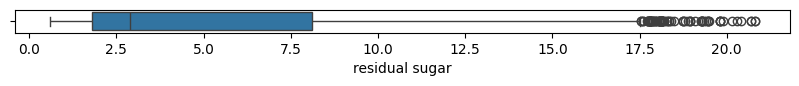

In [4]:
plt.figure(figsize=(10,0.3))
sbn.boxplot(df['residual sugar'], orient='h')

In [5]:
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower fence: {lower_fence}")
print(f"Upper fence: {upper_fence}")

Lower fence: -7.6499999999999995
Upper fence: 17.549999999999997


In [6]:
outliers = df[
    (df['residual sugar'] < lower_fence) |
    (df['residual sugar'] > upper_fence)
]

print(f"Number of outliers: {len(outliers)}")
print("Outlier rows:\n", outliers)


Number of outliers: 88
Outlier rows:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1124            7.0             0.270         0.36           20.70      0.045   
1131            7.0             0.270         0.36           20.70      0.045   
1155            7.3             0.240         0.39           17.95      0.057   
1156            7.3             0.240         0.39           17.95      0.057   
1199            7.5             0.305         0.40           18.90      0.059   
...             ...               ...          ...             ...        ...   
4775            6.9             0.190         0.31           19.25      0.043   
4778            6.9             0.190         0.31           19.25      0.043   
4824            6.1             0.340         0.24           18.35      0.050   
4825            6.2             0.350         0.25           18.40      0.051   
4847            5.8             0.315         0.19           19.40     

In [7]:
df = df[~((df ['residual sugar'] < lower_fence) |(df['residual sugar'] > upper_fence))]

##### Remove the attributes, which aren’t correlated with the wine quality, as well as the attributes that are highly correlated with another independent attribute.

In [8]:
df = df.drop(columns=[
    'free sulfur dioxide', 'density', 'pH', 'residual sugar', 'fixed acidity'
])

##### Transform the data by applying PCA (Principle Component Analysis).

In [16]:
X = df.iloc[:,0:7].values
y = df.iloc[:,6].values

In [22]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [25]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [27]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

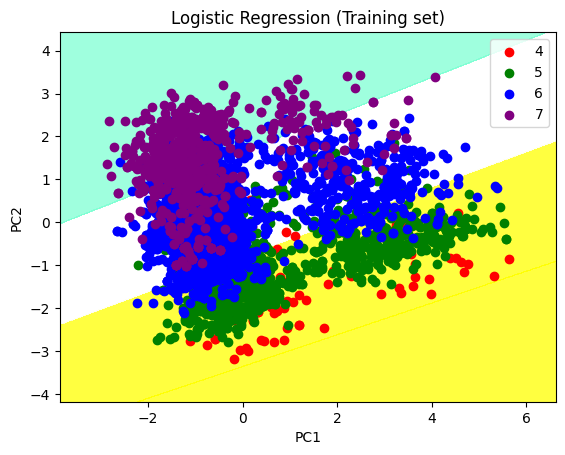

In [29]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue', 'purple'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

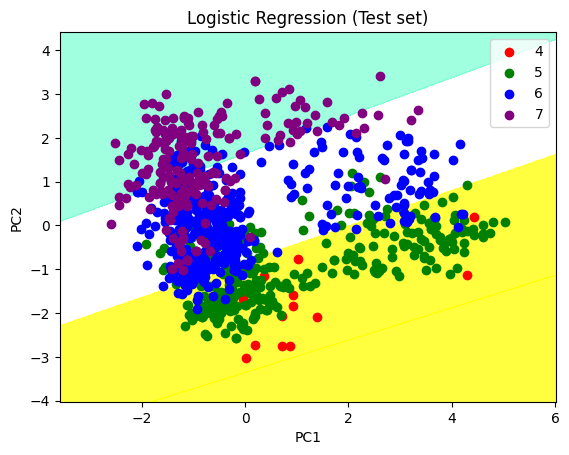

In [30]:
# Visualising the Test set results through scatter plot
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue', 'purple'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()

# show scatter plot
plt.show()

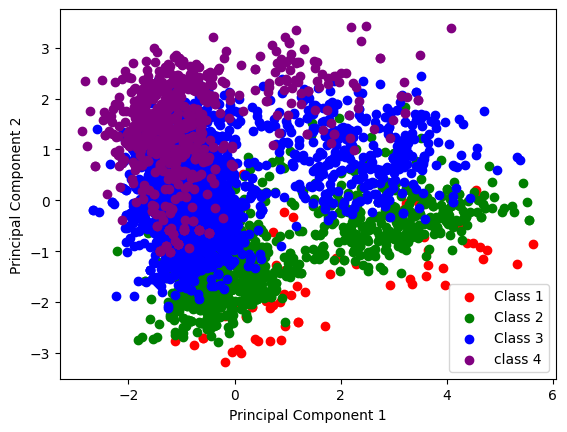

In [39]:
# plot the first two principal components with labels
colors = ["r", "g", "b", "purple"]
labels = ["Class 1", "Class 2", "Class 3", "class 4"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

##### Print out ten random rows from the final dataset as a prove of concept.

In [48]:
df.sample(10, random_state=42)

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality,type
3255,0.48,0.32,0.021,121.0,0.53,12.7,7,white
1705,0.29,0.40,0.024,177.0,0.32,11.5,6,white
1044,0.74,0.03,0.054,16.0,0.63,11.5,6,red
4899,0.23,0.38,0.044,113.0,0.73,11.4,5,white
1555,0.26,0.50,0.048,153.0,0.61,9.8,5,white
1034,0.91,0.06,0.060,11.0,0.64,10.9,4,red
2130,0.26,0.41,0.042,162.0,0.38,12.0,7,white
4339,0.25,0.32,0.039,68.0,0.52,11.1,6,white
4152,0.24,0.18,0.050,145.0,0.46,10.3,5,white
3624,0.46,0.27,0.039,96.0,0.44,12.4,7,white
